## Sumário

[Funções de Ativação](#funcao-ativacao)

[Funções de Custo](#)

[Implementação e Comentários](#)

* [Problema 1](#)

* [Problema 2](#)

* [Problema 3](#)

* [Problema 4](#)

* [Problema 5](#)

* [Problema 6](#)

[Referências](#)

## Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from src.utils import plots
import matplotlib.pyplot as plt
import statistics as st
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, explained_variance_score

%matplotlib inline

C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Funções de Ativação

In [2]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

In [3]:
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [4]:
def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

In [5]:
def step(x,derivative=False):
    if derivative:
        return np.where(x>0,1,1)
    return np.where(x>0,1,0)

In [6]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

## Funções auxiliares

In [7]:
def softmax(x, y_oh=None, derivative=False):
    if derivative: 
        y_pred = softmax(x)
        y_correct = np.argmax(y_oh, axis=1)
        pk = y_pred[range(y_pred.shape[0]), y_correct]
        y_pred[range(y_pred.shape[0]), y_correct] = pk*(1.0 - pk)
        return y_pred
    exp = np.exp(x)
    return exp/np.sum(exp, axis=1, keepdims=True)

In [8]:
def neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_pred[range(y_pred.shape[0]), y_correct]
    if derivative:
        y_pred[range(y_pred.shape[0]), y_correct] = (-1.0/pk)
        return y_pred
    return np.mean(-np.log(pk))

## Funções de custo

In [9]:
def mse(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return np.mean((y - y_pred)**2)

In [10]:
def sigmoid_cross_entropy(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [11]:
def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_softmax[range(y_softmax.shape[0]), y_correct]
    if derivative:
        return -(y_oh - y_softmax)/y_oh.shape[0]
    return np.mean(-np.log(pk))

## Implementação e Comentários

Resoluções das questões utilizando numpy e o framework keras

### Problema 1

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede de Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação.
Dica: O problema pode ser formulado como um problema de classificação de 8 padrões
diferentes, sendo que cada padrão representa um vértice do cubo.

In [12]:
x,y = np.loadtxt('data/1a1X.txt', delimiter=','), np.loadtxt('data/1a1Y.txt', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=2000, stratify=y, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3000, 3), (2000, 3), (3000, 8), (2000, 8))

### Numpy

In [13]:
w = np.random.random((8, 3))-0.5
b = np.zeros(8)

learning_rate = 0.02

for s in range(200):
    for x_i, y_i in zip(x_train,y_train):
        x_i =  x_i.reshape(1, x_train.shape[1])
        y_pred = np.dot(x_i, w.T) + b
        y_pred = step(y_pred)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        
    if s%50 == 0:
        print('step {0}: {1}'.format(s, error))
        
y_pred = step(np.dot(x_val, w.T)+b)
print('w: ', w)
print('b: ', b)
print('y_pred: ', y_pred)

accuracy_score(y_val, y_pred)

step 0: [[0. 0. 0. 0. 0. 0. 0. 0.]]
step 50: [[0. 0. 0. 0. 0. 0. 0. 0.]]
step 100: [[0. 0. 0. 0. 0. 0. 0. 0.]]
step 150: [[0. 0. 0. 0. 0. 0. 0. 0.]]
w:  [[-0.01731232 -0.25828131 -0.13952083]
 [-0.00896328 -0.51748468  0.20493348]
 [-0.48306482  0.17073307 -0.30401128]
 [-0.03169918  0.03979392  0.01327477]
 [ 0.02005214 -0.15024416 -0.45851601]
 [ 0.04887091 -0.0317306   0.2418992 ]
 [ 0.02927826  0.07225735 -0.04672746]
 [ 0.18852027  0.05942381  0.02807066]]
b:  [[ 6.9388939e-18 -2.0000000e-01 -2.0000000e-02 -4.0000000e-02
  -2.0000000e-02 -2.6000000e-01 -1.0000000e-01 -2.6000000e-01]]
y_pred:  [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


1.0

### Keras

In [14]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=x_train.shape[1]))
model.compile(loss='mse', optimizer='sgd')

model.fit(x_train, y_train, epochs=200, batch_size=x.shape[0], verbose=0)
y_pred = model.predict(x, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('error: ', error)
print('w:', w.T)
print('b:', b)
print('y_pred:', y_pred)

error:  0.11090661585330963
w: [[-0.45755833 -0.0269426  -0.17175758]
 [-0.6729473   0.39568844 -0.55468655]
 [ 0.5902099  -0.556408   -0.45607546]
 [ 0.33605927 -0.23022187  0.1189442 ]
 [ 0.6539177   0.10900149 -0.49400386]
 [-0.1164835  -0.49628407  0.59143496]
 [ 0.09148223  0.41198498 -0.25087652]
 [ 0.02678742  0.24627826  0.00426248]]
b: [ 0.05989224 -0.02403298 -0.04974271 -0.07679194 -0.05928813 -0.01115551
 -0.02480421  0.00060662]
y_pred: [[0.03294964 0.37165546 0.         ... 0.         0.38718078 0.24688488]
 [0.         0.         0.         ... 0.08399538 0.13630426 0.25114736]
 [0.         0.         0.08439173 ... 0.46379593 0.         0.03165652]
 ...
 [0.         0.         0.         ... 0.5804928  0.         0.00209582]
 [0.         0.         0.5404672  ... 0.         0.06667802 0.02739405]
 [0.         0.         0.         ... 0.58027947 0.         0.0048691 ]]


### Problema 2

Implemente uma rede perceptron de múltiplas camadas treinando-a com os seguintes
algoritmos:

- Algoritmo da retropropagação em modo estocástico usando a regra delta;

- Algoritmo da retropropagação em modo por lote usando a regra delta;

- Algoritmo da retropropagação usando a regra delta com termo do momento;


In [15]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=step, use_bias=True):
        self.input = None
        self.weights = np.random.randn(output_dim, input_dim)
        self.bias = np.random.randn(1, output_dim)
        self.activation = activation
        self._activ_inp, self._activ_out = None, None
        self.input_dim = input_dim
        self.use_bias = use_bias
        self._dweights, self._dbias, self._prev_dweights = None, None, 0.0

In [16]:
class NeuralNetwork:
    def __init__(self, cost_func=mse, learning_rate=1e-3, momentum=0.0):
        self._layers = []
        self.cost_func = cost_func
        self._learning_rate = learning_rate
        self.momentum = momentum
        self.epoch_error_train = []
    
    def __backpropagation(self, y,y_pred):
        last_delta = self.cost_func(y, y_pred, derivative=True)
        for layer in reversed(self._layers):
            dactivation = layer.activation(layer._activ_inp, derivative=True)*last_delta
            last_delta = np.dot(dactivation, layer.weights)
            layer.dweights = np.dot(dactivation.T, layer.input)
            layer.dbias = 1.0*dactivation.sum(axis=0, keepdims=True)
        
        for layer in reversed(self._layers):
            layer._prev_dweights = -self._learning_rate*layer.dweights + self.momentum*layer._prev_dweights
            layer.weights = layer.weights + layer._prev_dweights
            layer.biases = layer.bias - self._learning_rate*layer.dbias
    
    def __forward(self, x):
        self._layers[0].input = x
        for current_layer, next_layer in zip(self._layers, self._layers[1:] + [Layer(0,0)]):
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.bias
            current_layer._activ_inp = y
            current_layer._activ_out = next_layer.input = current_layer.activation(y)
        return self._layers[-1]._activ_out

    def add(self, layer):
        self._layers.append(layer)
    
    def evaluate(self,y_pred, y, dtype=int):
        score = 0
        total = 100.0/y.shape[0]
        y_pred = y_pred.astype(dtype)
        y = y.astype(dtype)

        for y_i, y_pred_i in zip(y,y_pred):
            if np.array_equal(y_i,y_pred_i):
                score+=1
        return score*total

    def fit(self, X=None, Y=None, epochs=1, by_batch=False, verbose=0):
        self.epoch_error_train = []
        for step in range(epochs+1):
            cost = 0
            if by_batch:
                y_pred = self.__forward(X)
                self.__backpropagation(Y, y_pred)
                cost += self.cost_func(Y, y_pred)

            else:
                for x_i, y_i in zip(X, Y):
                    x_i = x_i.reshape(1, X.shape[1])
                    y_pred = self.__forward(x_i)
                    self.__backpropagation(y_i, y_pred)
                    cost += self.cost_func(y_i, y_pred)
            #--
            self.epoch_error_train.append([np.mean(cost), step])
    
            if step % verbose == 0:
                cost = self.cost_func(Y, self.predict(X))
                print("epoch: {0:=4}/{1} cost: {2:.8f}".format(step, epochs, cost))
                
    def get_learning_rate(self):
        return self._learning_rate

    def get_weights(self):
        return self._layers[-1].weights, self._layers[-1].bias

    def predict(self, X, verbose=False):
        return self.__forward(X)

### Problema 3

Usando algoritmos implementados na questão 2, aproxime as funções abaixo. Compare os
resultados com as curvas exatas, para o caso dos itens b e c e apresente para cada caso a
curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação. Faça uma análise comparativa sobre a convergência de cada um
dos algoritmos

### Função lógica XOR

In [51]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


### Estocástico

In [18]:
D_in, D_out = x.shape[1], y.shape[1]
model = NeuralNetwork(cost_func=sigmoid_cross_entropy, learning_rate=0.5)
model.add(Layer(input_dim=D_in, output_dim=5, activation=sigmoid))
model.add(Layer(input_dim=5, output_dim=D_out, activation=sigmoid))
model.fit(x, y, epochs=1000, verbose=100, by_batch=False)
y_pred = model.predict(x) > 0.5
print('y_pred:', y_pred)

accuracy_score(y.reshape(-1, 1), y_pred)

epoch:    0/1000 cost: 0.79525702
epoch:  100/1000 cost: 0.57878100
epoch:  200/1000 cost: 0.48755142
epoch:  300/1000 cost: 0.38025657
epoch:  400/1000 cost: 0.24801244
epoch:  500/1000 cost: 0.16946359
epoch:  600/1000 cost: 0.12875187
epoch:  700/1000 cost: 0.10510971
epoch:  800/1000 cost: 0.08980560
epoch:  900/1000 cost: 0.07908173
epoch: 1000/1000 cost: 0.07112396
y_pred: [[False]
 [ True]
 [ True]
 [False]]


1.0

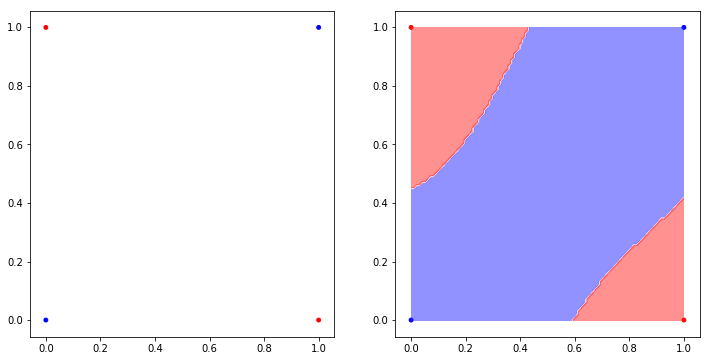

In [19]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

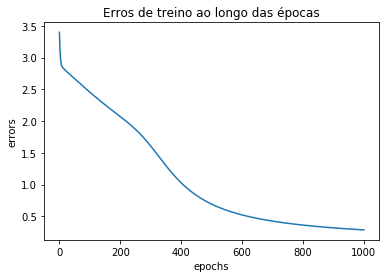

In [20]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

### Batch

In [21]:
D_in, D_out = x.shape[1], y.shape[1]
model = NeuralNetwork(cost_func=sigmoid_cross_entropy, learning_rate=0.5)
model.add(Layer(input_dim=D_in, output_dim=5, activation=sigmoid))
model.add(Layer(input_dim=5, output_dim=D_out, activation=sigmoid))
model.fit(x, y, epochs=1000, by_batch=True, verbose=100)
y_pred = model.predict(x) > 0.5
print('y_pred:', y_pred)

accuracy_score(y.reshape(-1, 1), y_pred)

epoch:    0/1000 cost: 0.91627374
epoch:  100/1000 cost: 0.66185399
epoch:  200/1000 cost: 0.58921487
epoch:  300/1000 cost: 0.50900705
epoch:  400/1000 cost: 0.44757155
epoch:  500/1000 cost: 0.40487535
epoch:  600/1000 cost: 0.36741088
epoch:  700/1000 cost: 0.32577843
epoch:  800/1000 cost: 0.27432551
epoch:  900/1000 cost: 0.22228934
epoch: 1000/1000 cost: 0.18361765
y_pred: [[False]
 [ True]
 [ True]
 [False]]


1.0

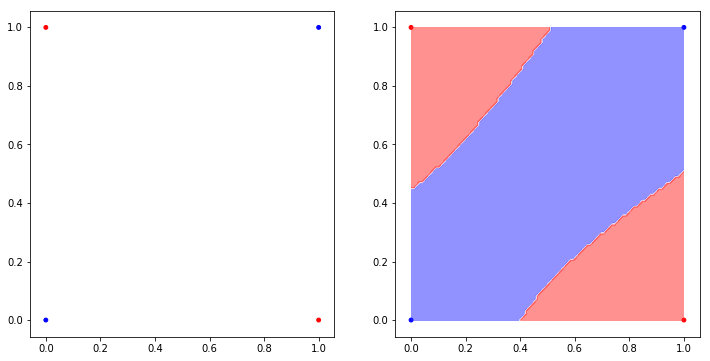

In [22]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

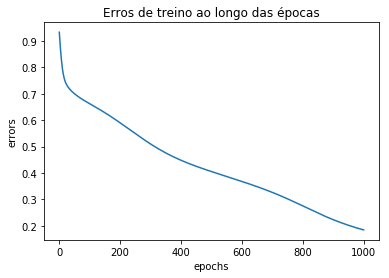

In [23]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

## Momentum

In [56]:
D_in, D_out = x.shape[1], y.shape[1]
model = NeuralNetwork(cost_func=sigmoid_cross_entropy, learning_rate=0.5, momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=5, activation=sigmoid))
model.add(Layer(input_dim=5, output_dim=D_out, activation=sigmoid))
model.fit(x, y, epochs=50, verbose=100, by_batch=False)
y_pred = model.predict(x) > 0.5
print('y_pred:', y_pred)

accuracy_score(y.reshape(-1, 1), y_pred)

epoch:    0/50 cost: 1.49549689
y_pred: [[False]
 [ True]
 [ True]
 [False]]


1.0

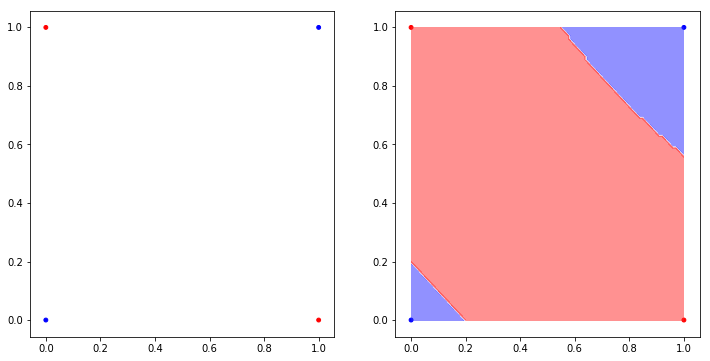

In [57]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

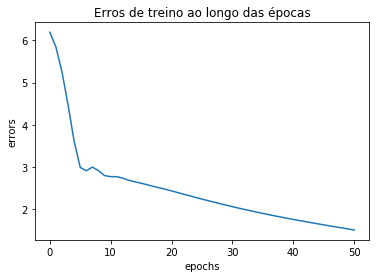

In [58]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

### sen(xπ)/xπ  ,  0 ≤ x ≤ 4

In [24]:
x,y = np.loadtxt('data/1a3bX.txt'), np.loadtxt('data/1a3bY.txt')
x_train, x_val, y_train, y_val = train_test_split(x.reshape(-1,1), y.reshape(-1,1), test_size=2000, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3000, 1), (2000, 1), (3000, 1), (2000, 1))

### Estocástico

In [25]:
D_in, D_out = x_train.shape[1], y_train.shape[1]
model = NeuralNetwork(learning_rate=0.01)
model.add(Layer(input_dim=D_in, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=D_out, activation=linear))
model.fit(x_train, y_train, epochs=1000, by_batch=False, verbose=100)
y_pred = model.predict(x_val)
print('y_pred:', y_pred)

epoch:    0/1000 cost: 0.21302368
epoch:  100/1000 cost: 0.00514711
epoch:  200/1000 cost: 0.00253592
epoch:  300/1000 cost: 0.00190028
epoch:  400/1000 cost: 0.00150965
epoch:  500/1000 cost: 0.00122039
epoch:  600/1000 cost: 0.00097619
epoch:  700/1000 cost: 0.00076356
epoch:  800/1000 cost: 0.00059356
epoch:  900/1000 cost: 0.00046309
epoch: 1000/1000 cost: 0.00036065
y_pred: [[ 0.49535183]
 [-0.19279498]
 [-0.46999205]
 ...
 [ 0.00911242]
 [-0.82308869]
 [-0.24577269]]


0.9985889663984064


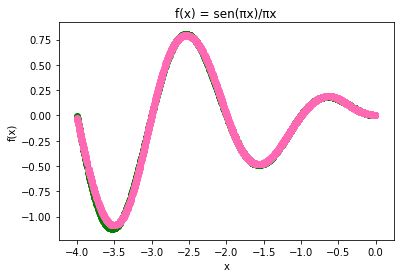

In [26]:
print(r2_score(y_val, y_pred=y_pred))
plt.title('f(x) = sen(πx)/πx')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(x_val, y_val, c='green')
plt.scatter(x_val, y_pred, c='hotpink')

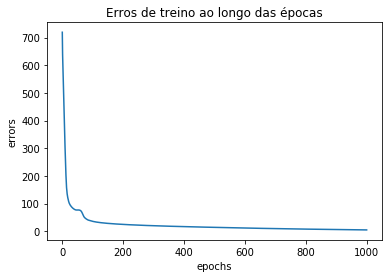

In [27]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])


### Batch

In [28]:
D_in, D_out = x_train.shape[1], y_train.shape[1]
model = NeuralNetwork(learning_rate=1e-5)
model.add(Layer(input_dim=D_in, output_dim=20, activation=tanh))
model.add(Layer(input_dim=20, output_dim=20, activation=tanh))
model.add(Layer(input_dim=20, output_dim=D_out, activation=linear))
model.fit(x_train, y_train, epochs=3000, by_batch=True, verbose=500)
y_pred = model.predict(x_val)
print('y_pred:', y_pred)

epoch:    0/3000 cost: 6.53964840
epoch:  500/3000 cost: 0.07552921
epoch: 1000/3000 cost: 0.04643504
epoch: 1500/3000 cost: 0.02613032
epoch: 2000/3000 cost: 0.01584677
epoch: 2500/3000 cost: 0.01060788
epoch: 3000/3000 cost: 0.00790500
y_pred: [[ 0.43093268]
 [-0.25981761]
 [-0.41104565]
 ...
 [-0.00887366]
 [-0.82805262]
 [-0.19594827]]


0.9664791402005888


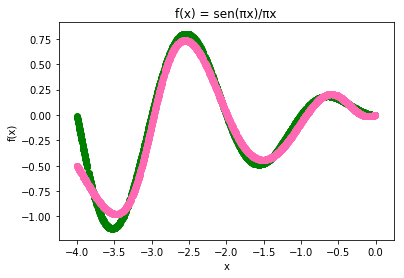

In [29]:
print(r2_score(y_val, y_pred=y_pred))
plt.title('f(x) = sen(πx)/πx')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(x_val, y_val, c='green')
plt.scatter(x_val, y_pred, c='hotpink')

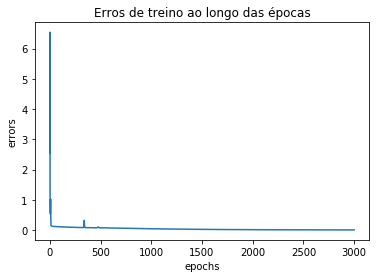

In [30]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

## Momentum

In [48]:
D_in, D_out = x_train.shape[1], y_train.shape[1]
model = NeuralNetwork(learning_rate=1e-3, momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=D_out, activation=linear))
model.fit(x_train, y_train, epochs=500, by_batch=False, verbose=100)
y_pred = model.predict(x_val)
print('y_pred:', y_pred)

epoch:    0/500 cost: 0.12945009
epoch:  100/500 cost: 0.00164823
epoch:  200/500 cost: 0.00050778
epoch:  300/500 cost: 0.00018553
epoch:  400/500 cost: 0.00009260
epoch:  500/500 cost: 0.00006356
y_pred: [[ 0.48185403]
 [-0.19751276]
 [-0.4652985 ]
 ...
 [-0.00166007]
 [-0.80989866]
 [-0.24912483]]


0.9997321052222252


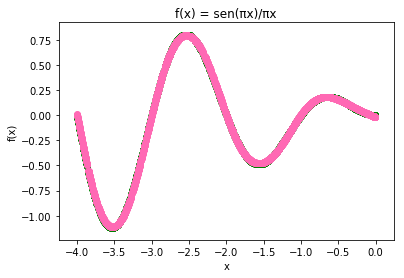

In [49]:
print(r2_score(y_val, y_pred=y_pred))
plt.title('f(x) = sen(πx)/πx')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(x_val, y_val, c='green')
plt.scatter(x_val, y_pred, c='hotpink')

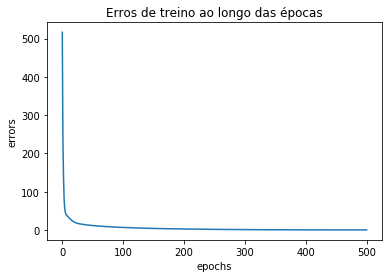

In [50]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

### Problema 4

Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão

In [63]:
x, y = np.loadtxt('data/1a4X.txt', delimiter=','), np.loadtxt('data/1a4Y.txt').reshape(-1,1)
x.shape, y.shape

((7883, 2), (7883, 1))

In [64]:
onehot = OneHotEncoder(sparse=False)
y_oh = onehot.fit_transform(y)
y_oh

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [65]:
D_in, D_out = x.shape[1], y_oh.shape[1]

model = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-1, momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=20, activation=linear))
model.add(Layer(input_dim=20, output_dim=D_out, activation=linear))

model.fit(X=x, Y=y_oh, epochs=5000, by_batch=True, verbose=1000)
y_pred = model.predict(x).argmax(axis=1)

print('Matriz de de confusão:\n', confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

epoch:    0/5000 cost: 6.01446311
epoch: 1000/5000 cost: 0.10358367
epoch: 2000/5000 cost: 0.07708687
epoch: 3000/5000 cost: 0.06500062
epoch: 4000/5000 cost: 0.05767394
epoch: 5000/5000 cost: 0.05261476
Matriz de de confusão:
 [[1203    4    0    0    2    0    0    0]
 [   0 1296    0    1    0    7    0    0]
 [   2    0 1265    0    0    0    5    0]
 [   0    2    0 1212    0    0    0   11]
 [   1    0    0    0  711    0    0    0]
 [   0    3    0    0    0  744    0    0]
 [   0    0    1    0    0    0  728    0]
 [   0    0    0    0    0    0    0  685]]


0.9950526449321324

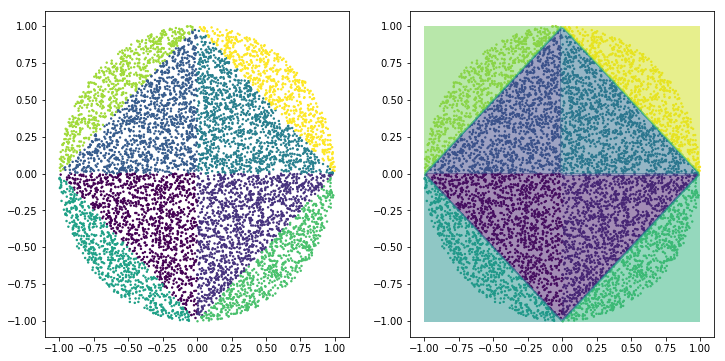

In [66]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model, s=2)

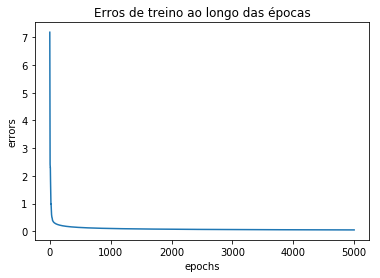

In [67]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

### Problema 5

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal . Avalie o desempenho mostrando para cada caso os erros de predição. 
Dica: Para auxiliar na resolução desse problema você pode usar K entradas (por exemplo, K=10), que correspondem a K passos anteriores a n: x(n-1), x(n-2),..., x(n-K), e deve fazer a
predição dos valores x(n+1), x(n+2) e x(n+3)

In [59]:
x = np.linspace(-5, 5, 1000).reshape(-1, 1)
y = np.sin(x + np.sin(x)**2).reshape(-1, 1)

In [60]:
D_in, D_out = x.shape[1], y.shape[1]

model = NeuralNetwork(cost_func=mse, learning_rate=1e-4)
model.add(Layer(input_dim=D_in, output_dim=20, activation=tanh))
model.add(Layer(input_dim=20, output_dim=30, activation=tanh))
model.add(Layer(input_dim=30, output_dim=30, activation=tanh))
model.add(Layer(input_dim=30, output_dim=D_out, activation=linear))

model.fit(x, y, epochs=1000, verbose=100)
y_pred = model.predict(x)

epoch:    0/1000 cost: 9.83022544
epoch:  100/1000 cost: 0.01393648
epoch:  200/1000 cost: 0.00713394
epoch:  300/1000 cost: 0.00528397
epoch:  400/1000 cost: 0.00446367
epoch:  500/1000 cost: 0.00401473
epoch:  600/1000 cost: 0.00371978
epoch:  700/1000 cost: 0.00349997
epoch:  800/1000 cost: 0.00332166
epoch:  900/1000 cost: 0.00316860
epoch: 1000/1000 cost: 0.00303194


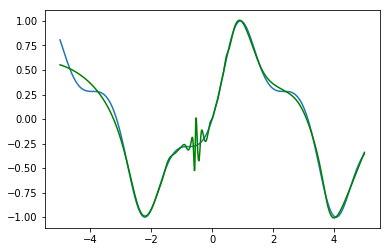

In [61]:
plt.plot(x, y)
plt.plot(x, y_pred, c='green')

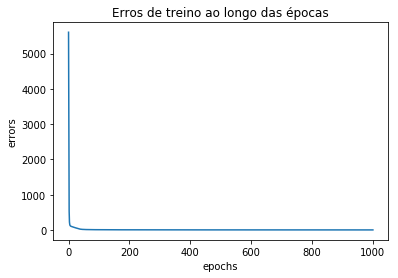

In [62]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

## Referências

* [Manual Prático Deep Learning - Arnaldo Gualberto](https://github.com/arnaldog12/Manual-Pratico-Deep-Learning)